In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
columns = session.query(Measurement).first()
columns.__dict__.keys()

dict_keys(['_sa_instance_state', 'prcp', 'station', 'tobs', 'date', 'id'])

# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [17]:
# Calculate the date 1 year ago from the last data point in the database
year=session.query(func.max(Measurement.date)).all()
year
# Perform a query to retrieve the data and precipitation scores

precip_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").\
        filter(Measurement.date <= "2017-08-23").\
        group_by(Measurement.date).all()
precip_scores

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

results_df = pd.DataFrame(precip_scores)
results_df = results_df.set_index('date')
results_df.head()

prcp
date            
2016-08-23  0.00
2016-08-24  0.08
2016-08-25  0.08
2016-08-26  0.00
2016-08-27  0.00

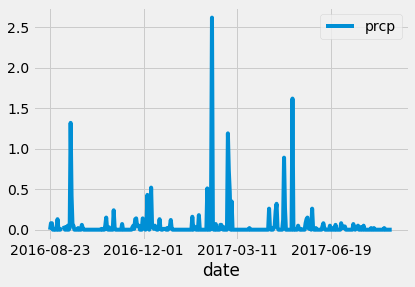

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
results_df.plot()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()


prcp
count  364.000000
mean     0.048709
std      0.204930
min      0.000000
25%      0.000000
50%      0.000000
75%      0.020000
max      2.620000

In [19]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(func.count(Station.station)).all()
station_count

[(9)]

In [30]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

most_active = 'USC00519281'

temp_description = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active).all()
temp_description

[(54.0, 85.0, 71.66378066378067)]

In [28]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

highest_station = session.query(Measurement.date, Measurement.station, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').filter(Measurement.date > '2016-08-23').order_by(Measurement.date).all()
highest_station_df = pd.DataFrame(highest_station)
highest_station_df

date      station  tobs
0    2016-08-24  USC00519281  77.0
1    2016-08-25  USC00519281  80.0
2    2016-08-26  USC00519281  80.0
3    2016-08-27  USC00519281  75.0
4    2016-08-28  USC00519281  73.0
..          ...          ...   ...
346  2017-08-14  USC00519281  77.0
347  2017-08-15  USC00519281  77.0
348  2017-08-16  USC00519281  76.0
349  2017-08-17  USC00519281  76.0
350  2017-08-18  USC00519281  79.0

[351 rows x 3 columns]

Text(0.5, 0, 'Temperature')

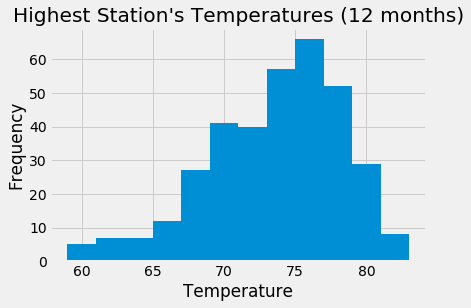

In [38]:
highest_station_df.hist(bins=12)
plt.title("Highest Station's Temperatures (12 months)")
labels = ['tobs']
plt.ylabel('Frequency')
plt.xlabel('Temperature')

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
